https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import os
os.listdir('../data')

['diabetes.csv', 'titanic']

In [2]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [3]:
diabetes = pd.read_csv('../data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
X = diabetes.iloc[::-1]
y = diabetes.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 156, stratify = y)
#stratify = y : y 처럼 비율을 지켜라

# logistic regression

In [8]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [9]:
import matplotlib.pyplot as plt

In [10]:
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    #f1 score
    f1 = f1_score(y_test, pred)
    print('confusion matrix')
    print(confusion)
    
    print('accurcacy : {0:4f}, precision : {1:4f}, sensitivity : {2:4f}, F1:{3:4f}'.format(accuracy, precision, recall, f1))
    
def precision_recall_curve_plot(y_test, pred_proba_c1) :
    
    precision, recall, threshold = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = threshold.shape[0]
    plt.plot(threshold, precision[:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(threshold, recall[:threshold_boundary], label = 'recall')
    
    #x축의 scale을 0.1단위로
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    
    plt.legend()
    plt.grid()
    plt.show()
    

In [11]:
get_clf_eval(y_test, pred)

confusion matrix
[[98  2]
 [52  2]]
accurcacy : 0.649351, precision : 0.500000, sensitivity : 0.037037, F1:0.068966


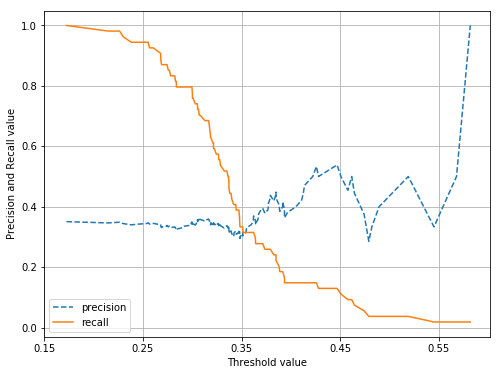

In [13]:
pred_proba_c1 = lr.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [14]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 0 : 이상치
- 0일 수 없는 값들이 0으로
- Glucose, BloodPressure, SkinThickness, Insulin, BMI
- 평균으로 대체

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

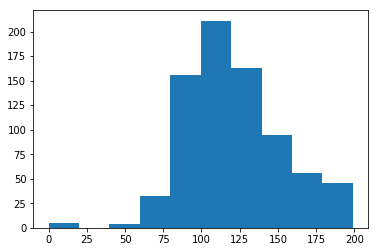

In [15]:
plt.hist(diabetes['Glucose'], bins = 10)

## 개수 확인

In [16]:
zero_feature = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = len(diabetes)
total_count

768

In [17]:
for feature in zero_feature :
    zero_count = diabetes[diabetes[feature] == 0][feature].count()
    
    print('{0} 0건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0건수는 5, 퍼센트는 0.65 %
BloodPressure 0건수는 35, 퍼센트는 4.56 %
SkinThickness 0건수는 227, 퍼센트는 29.56 %
Insulin 0건수는 374, 퍼센트는 48.70 %
BMI 0건수는 11, 퍼센트는 1.43 %


## 평균으로 imputation

In [18]:
mean_zero_feature = diabetes[zero_feature].mean()
mean_zero_feature

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [19]:
diabetes[zero_feature] = diabetes[zero_feature].replace(0, mean_zero_feature)

In [20]:
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1


In [21]:
X = diabetes.iloc[:, :-1]
y = diabetes['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

get_clf_eval(y_test, pred)

confusion matrix
[[98  2]
 [52  2]]
accurcacy : 0.649351, precision : 0.500000, sensitivity : 0.037037, F1:0.068966


C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 왜 값이 다를까...

# classification output

In [28]:
from sklearn.preprocessing import Binarizer

In [31]:
thresholds = [0.3 , 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr.predict_proba(X_test)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) :
    
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        
        print('threshold ; ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print('\n')

In [32]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold ;  0.3
confusion matrix
[[65 35]
 [11 43]]
accurcacy : 0.701299, precision : 0.551282, sensitivity : 0.796296, F1:0.651515


threshold ;  0.33
confusion matrix
[[71 29]
 [11 43]]
accurcacy : 0.740260, precision : 0.597222, sensitivity : 0.796296, F1:0.682540


threshold ;  0.36
confusion matrix
[[76 24]
 [15 39]]
accurcacy : 0.746753, precision : 0.619048, sensitivity : 0.722222, F1:0.666667


threshold ;  0.39
confusion matrix
[[78 22]
 [16 38]]
accurcacy : 0.753247, precision : 0.633333, sensitivity : 0.703704, F1:0.666667


threshold ;  0.42
confusion matrix
[[84 16]
 [18 36]]
accurcacy : 0.779221, precision : 0.692308, sensitivity : 0.666667, F1:0.679245


threshold ;  0.45
confusion matrix
[[85 15]
 [18 36]]
accurcacy : 0.785714, precision : 0.705882, sensitivity : 0.666667, F1:0.685714


threshold ;  0.48
confusion matrix
[[88 12]
 [19 35]]
accurcacy : 0.798701, precision : 0.744681, sensitivity : 0.648148, F1:0.693069


threshold ;  0.5
confusion matrix
[[90 10]
 [21 3

- threshold = 0.48일 때가 가장 좋아보인다.

In [33]:
binarizer = Binarizer(threshold=0.48)
pred_48 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_48)

confusion matrix
[[88 12]
 [19 35]]
accurcacy : 0.798701, precision : 0.744681, sensitivity : 0.648148, F1:0.693069
